<a href="https://www.kaggle.com/mohamedbakrey/mnist-using-different-models-in-deep-learning?scriptVersionId=88581856" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <html> <center>  Introduction.</center></html>
 **In this notebook, many methods and networks that concern and work on deep learning will be explained mainly, as each time a specific idea is added in a different way so that we are able to learn greatly, benefit and benefit from each other. Here, of course, the famous data (MNIST) is used, which is Which we work on all the time. We hope to learn together by adding your opinion in the comments if you see something that should be added to this netbook and do not forget to vote so that everyone can see it and be able to learn.**

In [3]:
pip install ipyplot

Note: you may need to restart the kernel to use updated packages.


In [4]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.layers import Flatten, concatenate
import ipyplot

# Loading Data

In [5]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step



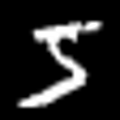
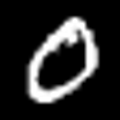
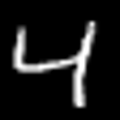
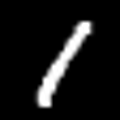
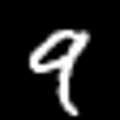
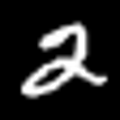
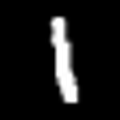
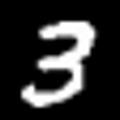
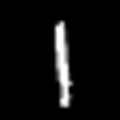
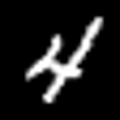


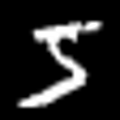
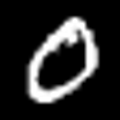
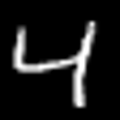
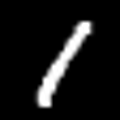
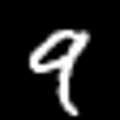
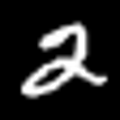
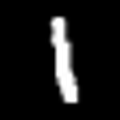
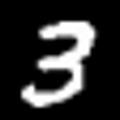
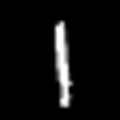
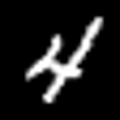

In [6]:
# Show Some of data train image
ipyplot.plot_images(x_train, max_images=10, img_width=120)

In [7]:
print("Train Data:", x_train.shape)
print("Train Data:", y_train.shape)
print("Train Data:", x_test.shape)
print("Train Data:", y_test.shape)

Train Data: (60000, 28, 28)
Train Data: (60000,)
Train Data: (10000, 28, 28)
Train Data: (10000,)


# compute the number of labels

In [8]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [9]:
print("Number Of Labels:",num_labels)

Number Of Labels: 10


In [10]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
print("Train after make To_Categorical:", y_train.shape)
print("Test after make To_Categorical:", y_test.shape)


Train after make To_Categorical: (60000, 10)
Test after make To_Categorical: (10000, 10)


In [12]:
# input image dimensions
image_size = x_train.shape[1]

In [13]:
print("Image Size:", image_size)

Image Size: 28


# Resize and Normalize

In [14]:
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])

In [15]:
print("Train After Make Normalize:",x_train.shape)
print("Test After Make Normalize:",x_test.shape)

Train After Make Normalize: (60000, 28, 28, 1)
Test After Make Normalize: (10000, 28, 28, 1)


In [16]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [17]:
print("Train After Make Normalize:",x_train.shape)
print("Test After Make Normalize:",x_test.shape)

Train After Make Normalize: (60000, 28, 28, 1)
Test After Make Normalize: (10000, 28, 28, 1)


# Network Parameters

In [18]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# Using CNN 

In [19]:
# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu',
        input_shape=input_shape))


model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout (Dropout)            (None, 576)               0

2022-02-23 16:29:20.085269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 16:29:20.216669: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 16:29:20.217594: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 16:29:20.219181: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

### Plot the Summary by using plot_model

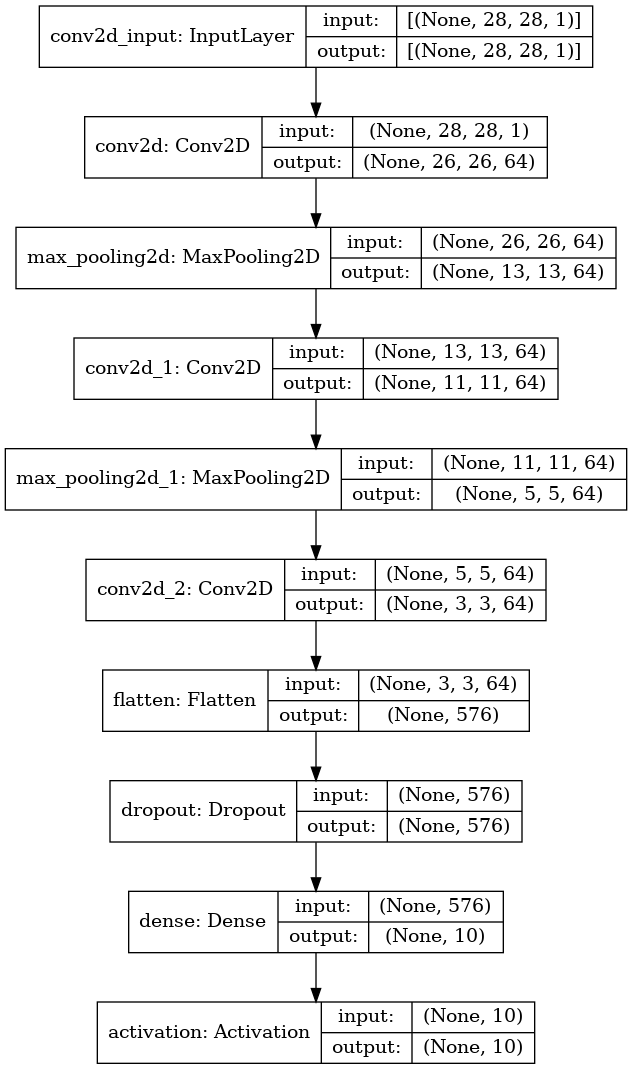

In [20]:
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [21]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [22]:
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

2022-02-23 16:29:23.853206: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-02-23 16:29:25.161372: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


469/469 [==============================] - 9s 5ms/step - loss: 0.2566 - accuracy: 0.9220
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0668 - accuracy: 0.9796
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0477 - accuracy: 0.9852
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0380 - accuracy: 0.9881
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0320 - accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0278 - accuracy: 0.9910
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0237 - accuracy: 0.9925
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0214 - accuracy: 0.9929
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0200 - accuracy: 0.9931
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0170 - accuracy: 0.9943


In [23]:
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9918


In [24]:
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 99.2%


# Using RNN Network

In [25]:
# load mnist dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


In [26]:
# compute the number of labels
num_labels = len(np.unique(Y_train))

In [27]:
# convert to one-hot vector
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [28]:
# resize and normalize
image_size = X_train.shape[1]
X_train = np.reshape(X_train,[-1, image_size, image_size])
X_test = np.reshape(X_test,[-1, image_size, image_size])

In [29]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [30]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

In [31]:
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
dropout=dropout,
input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


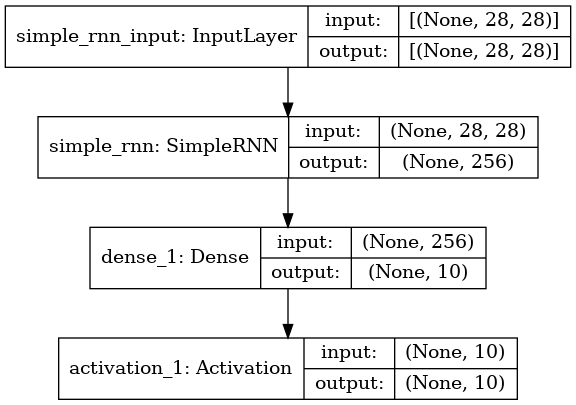

In [32]:
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

In [33]:
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy'])

In [34]:
# train the network
model.fit(X_train, Y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 11s 22ms/step - loss: 0.7581 - accuracy: 0.7811
Epoch 2/20
469/469 [==============================] - 11s 22ms/step - loss: 0.3350 - accuracy: 0.9012
Epoch 3/20
469/469 [==============================] - 11s 23ms/step - loss: 0.2473 - accuracy: 0.9258
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 0.2024 - accuracy: 0.9391
Epoch 5/20
469/469 [==============================] - 10s 21ms/step - loss: 0.1727 - accuracy: 0.9480
Epoch 6/20
469/469 [==============================] - 11s 24ms/step - loss: 0.1577 - accuracy: 0.9531
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1387 - accuracy: 0.9576
Epoch 8/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1273 - accuracy: 0.9617
Epoch 9/20
469/469 [==============================] - 11s 23ms/step - loss: 0.1193 - accuracy: 0.9639
Epoch 10/20
469/469 [==============================] - 10s 22ms/step - loss: 0.111

In [35]:
_, acc = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)


In [36]:
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 98.1%


# Using CNN Network By Functinal API 

In [37]:
from tensorflow.keras.layers import Dense, Dropout, Input

In [38]:
# load MNIST dataset
(x2_train, y2_train), (x2_test, y2_test) = mnist.load_data()

In [39]:
# from sparse label to categorical
num_labels = len(np.unique(y2_train))
y2_train = to_categorical(y2_train)
y2_test = to_categorical(y2_test)

In [40]:
print("Trian :",y2_train.shape)
print("Test :",y2_test.shape)

Trian : (60000, 10)
Test : (10000, 10)


In [41]:
# reshape and normalize input images
image_size = x2_train.shape[1]
x2_train = np.reshape(x2_train,[-1, image_size, image_size, 1])
x2_test = np.reshape(x2_test,[-1, image_size, image_size, 1])


In [42]:
print("X2 Trian:",x2_train.shape)
print("X2 Trian:",x2_test.shape)

X2 Trian: (60000, 28, 28, 1)
X2 Trian: (10000, 28, 28, 1)


In [43]:
x2_train = x2_train.astype('float32') / 255
x2_test = x2_test.astype('float32') / 255

In [44]:
# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
filters = 64
dropout = 0.3

##  Use functional API to build cnn layers

In [45]:
# use functional API to build cnn layers
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu')(y)

# image to vector before connecting to dense layer
y = Flatten()(y)


# dropout regularization
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

# build the model by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)

In [46]:
# network model in text
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0     

In [47]:
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [48]:
# train the model with input images and labels
model.fit(x2_train,
                y2_train,
                validation_data=(x2_test, y2_test),
                epochs=20,
                batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2855 - accuracy: 0.9108 - val_loss: 0.0571 - val_accuracy: 0.9821
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0725 - accuracy: 0.9779 - val_loss: 0.0354 - val_accuracy: 0.9883
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0517 - accuracy: 0.9839 - val_loss: 0.0289 - val_accuracy: 0.9896
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0280 - val_accuracy: 0.9908
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0274 - val_accuracy: 0.9905
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0264 - val_accuracy: 0.9916
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0281 - accuracy: 0.9914 - val_loss: 0.0240 - val_accuracy: 0.9926
Epoch 

In [49]:
# model accuracy on test dataset
score = model.evaluate(x2_test,
                            y2_test,
                            batch_size=batch_size,
                            verbose=0)

In [50]:
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 99.3%


# Using CNN-Y-Network

In [51]:
# load MNIST dataset
(x3_train, y3_train), (x3_test, y3_test) = mnist.load_data()

In [52]:
# from sparse label to categorical
num_labels = len(np.unique(y3_train))
print("The Num_Labels:",num_labels)

The Num_Labels: 10


In [53]:
y3_train = to_categorical(y3_train)
y3_test = to_categorical(y3_test)

In [54]:
print("Y_Train:",y3_train.shape)
print("Y_Test:",y3_test.shape)

Y_Train: (60000, 10)
Y_Test: (10000, 10)


In [55]:
# reshape and normalize input images
image_size = x3_train.shape[1]
x3_train = np.reshape(x3_train,[-1, image_size, image_size, 1])
x3_test = np.reshape(x3_test,[-1, image_size, image_size, 1])

In [56]:
print("X_train:",x3_train.shape)
print("X_test:",x3_test.shape)

X_train: (60000, 28, 28, 1)
X_test: (10000, 28, 28, 1)


In [57]:
x3_train = x3_train.astype('float32') / 255
x3_test = x3_test.astype('float32') / 255

In [58]:
print("Train:",x3_train.shape)
print("Test:",x3_test.shape)

Train: (60000, 28, 28, 1)
Test: (10000, 28, 28, 1)


In [59]:
# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
dropout = 0.4
n_filters = 32

In [60]:
# left branch of Y network
left_inputs = Input(shape=input_shape)
x = left_inputs
filters = n_filters
# 3 layers of Conv2D-Dropout-MaxPooling2D
# number of filters doubles after each layer (32-64-128)
for i in range(3):
        x = Conv2D(filters=filters,
        kernel_size=kernel_size,
        padding='same',
        activation='relu')(x)
        
x = Dropout(dropout)(x)
x = MaxPooling2D()(x)
filters *= 2

# right branch of Y network
right_inputs = Input(shape=input_shape)
y = right_inputs
filters = n_filters

# 3 layers of Conv2D-Dropout-MaxPooling2Do
# number of filters doubles after each layer (32-64-128)
for i in range(3):
        y = Conv2D(filters=filters,
        kernel_size=kernel_size,
        padding='same',activation='relu',
        dilation_rate=2)(y)
y = Dropout(dropout)(y)
y = MaxPooling2D()(y)
filters *= 2

# merge left and right branches outputs
y = concatenate([x, y])
# feature maps to vector before connecting to Dense
y = Flatten()(y)
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)                   

### build the model in functional API

In [61]:
# build the model in functional API
model = Model([left_inputs, right_inputs], outputs)

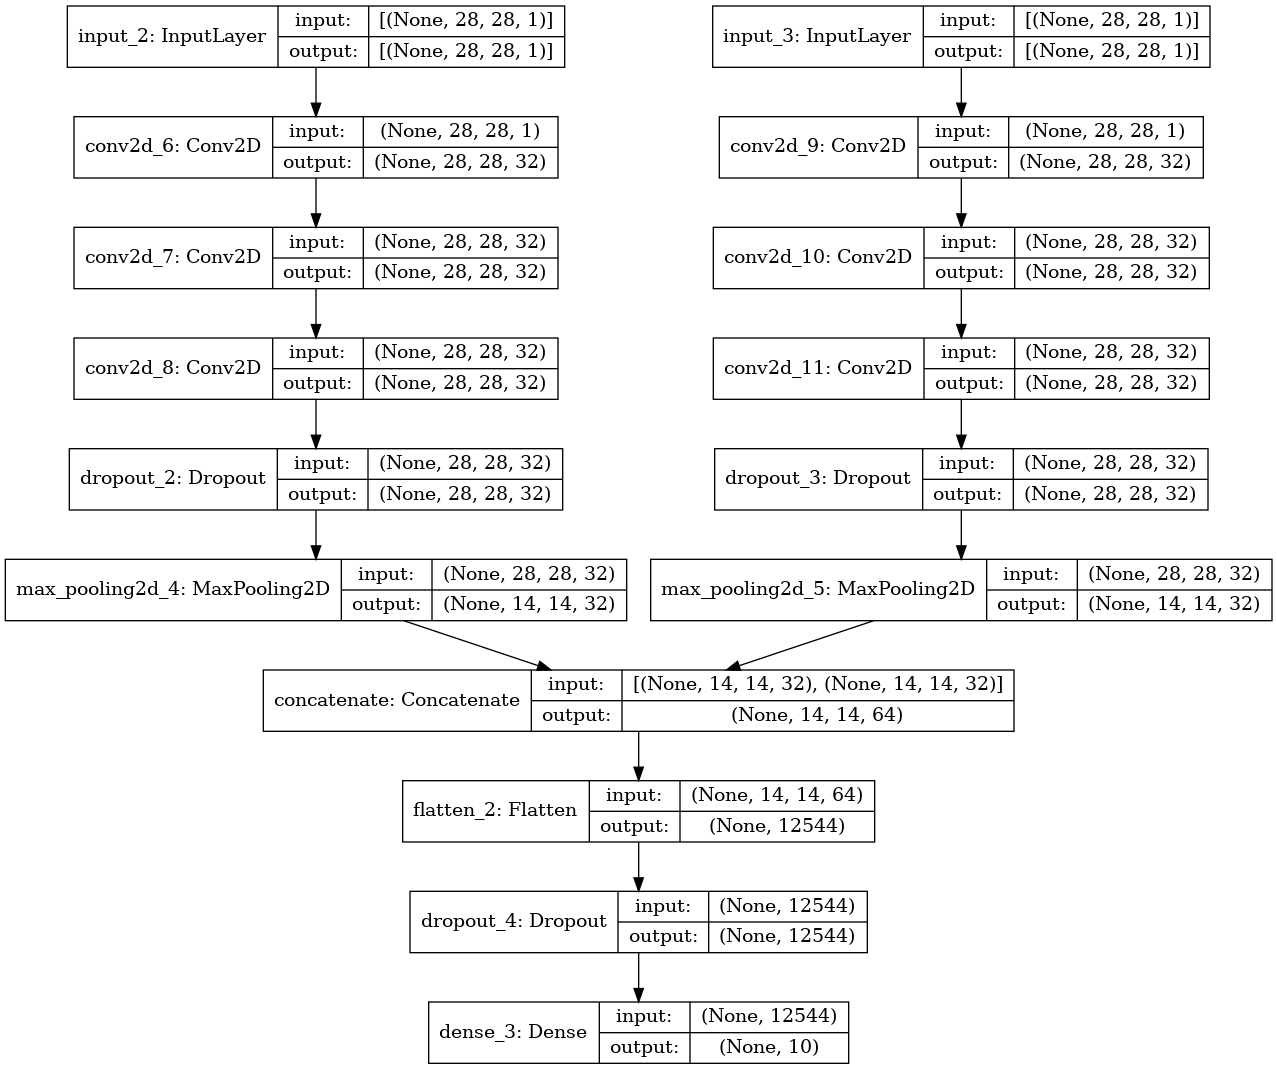

In [62]:
# verify the model using graph
plot_model(model, to_file='cnn-y-network.png', show_shapes=True)

In [63]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 28, 28, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 28, 28, 32)   320         input_3[0][0]                    
____________________________________________________________________________________________

In [64]:
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='categorical_crossentropy',
                                            optimizer='adam',
                                            metrics=['accuracy'])

In [65]:
# train the model with input images and labels
model.fit([x3_train, x3_train],
                            y3_train,
                            validation_data=([x3_test, x3_test], y3_test),
                            epochs=10,
                            batch_size=batch_size)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1302 - accuracy: 0.9602 - val_loss: 0.0602 - val_accuracy: 0.9842
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0513 - accuracy: 0.9844 - val_loss: 0.0392 - val_accuracy: 0.9878
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0404 - accuracy: 0.9873 - val_loss: 0.0287 - val_accuracy: 0.9907
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.0260 - val_accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0263 - val_accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0237 - val_accuracy: 0.9925
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0241 - val_ac

In [66]:
# model accuracy on test dataset
score = model.evaluate([x_test, x_test],
                                      y_test,
                                      batch_size=batch_size,
                                      verbose=0)


In [67]:
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 99.2%
